In [1]:
!pip install requests beautifulsoup4 selenium

In [3]:
!pip install pandas scikit-learn konlpy
!pip install soynlp

In [29]:
import pandas as pd

data = pd.read_excel('/Users/user/Documents/DF/리뷰분석프로젝트/review.xlsx')
df = pd.DataFrame(data)

In [31]:
from konlpy.tag import Okt

okt = Okt()

stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

def preprocess_review(text):
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

df['리뷰내용_전처리'] = df['리뷰내용'].apply(preprocess_review)

negative_words = [
    "불만", "문제", "최악", "실망", "고장", "부러짐", "끊김", "불친절", "불량", "짜증", "후회", "고르지 않음", "환불", 
    "파손", "흠집", "불쾌", "불편", "망가짐", "불량품", "작동불가", "결함", "거짓", "거부", "막힘", "잘못", "시간낭비", 
    "형편없음", "취소", "터무니없음", "속임수", "오작동", "별로", "서비스 부족", "이상함", "기대 이하", "수준 낮음", "차별", 
    "불성실", "무책임", "늦음", "헛수고", "헛돈", "분노", "사기", "무례함", "무능력", "헛걸음", "버림", "허세", "답답함", 
    "눈치없음", "두려움", "부정", "괴로움", "부끄러움", "불법", "불공정", "과장", "과속", "폭력", "강요", "압박", "혼란", 
    "모순", "혼돈", "위협", "불복", "무시", "방치", "불신", "손실", "비용", "망설임", "불이익", "불편함", "이탈", "악몽", 
    "혐오", "비난", "차질", "불평", "공포", "무관심", "부당함", "피해", "손해", "저주", "반항", "무지", "무질서", "무기력", 
    "적대감", "멸시", "비하", "독설", "장애", "장해", "굴욕", "무책임", "지연", "피곤", "악취", "불청", "저속", "모욕", 
    "범죄", "반칙", "부상", "탓", "절망", "비참", "비애", "불안", "불명예", "불순", "질책", "저항", "낭비", "부패", 
    "비효율", "낙담", "우울", "결렬", "충돌", "실패", "미숙", "억압", "배신", "고소", "욕망", "무단", "방임", "체포", 
    "불명확", "경고", "불친절", "소외", "반발", "논란", "오염", "불법", "차단", "폐쇄", "방해", "불가", "억지", "불필요", 
    "복수", "혼선", "분리", "배제", "압도", "소란", "질병", "폭주", "난폭", "분쟁", "위험", "폭력", "살인", "협박", "교란", 
    "불행", "분열", "방황", "불만족", "비하", "무례", "무책임", "파괴", "거절", "충격", "악화", "변명", "편견", "괴롭힘", 
    "속임수", "비참", "낙담", "결함", "헛소리", "고통", "절망", "지옥", "악화", "비속어", "위반", "무관심", "모순", "멸시", 
    "불신", "질병", "폭언", "가해", "도난", "훼손", "불쾌감", "패배", "무능함", "도전", "악행", "학대", "침해", "폐쇄", 
    "오류", "불확실", "불이행", "억울함", "무기력", "적대", "악성", "혼란", "갈등", "파멸", "패배감", "불발", "부조리", 
    "망상", "편향", "타락", "폭식", "외면", "무지", "무력감", "중단", "몰락", "변질", "왜곡", "파괴자", "파탄", "탈선", 
    "혼돈", "폭동", "추락", "악성", "불화", "헛된", "탈락", "굴욕감", "탈진", "유린", "무용", "굴욕", "지체", "단절", 
    "저주", "분노", "혼란", "폭발", "방황", "비참", "압박감", "실망감", "박탈", "몰상식", "헛소리", "배신", "허탈", "공포감", 
    "억압", "혼동", "오점", "우울증", "악성", "혼돈", "고독", "배신자", "실망", "악몽", "불행감", "불편함", "비상식", "망가짐", 
    "불량품", "작동불가", "결점", "불법행위", "속박", "장애물", "억지력", "불화", "절망감", "혐오감", "절망감", "괴리감", 
    "타락함", "침묵", "낙담함", "부패함", "질병감", "악몽", "고독함", "절단", "비관", "혼잡", "절망적인", "피해자", "거절함", 
    "저주받음", "불결함", "악행", "학대받음", "모멸감", "흉악", "잔혹함", "저급함", "거짓말", "소송", "갈등", "부상당함", 
    "모욕받음", "손실감", "위험요소", "배신감", "무의미", "비효율적", "절망적인", "절망에 빠진", "파괴적인", "학대받은", 
    "비난받은", "악성", "몰락한", "혼잡한", "파괴된", "고통스러운", "불명확한", "절망적인", "허탈한", "부서진", "패배한", 
    "파괴된", "분리된", "침해된", "배신당한", "침묵된", "절망감", "부상당한", "망가진", "피해를 입은", "가로막힌", 
    "비난받은", "위험한", "고통스러운", "망가진", "위반한", "혼란스러운", "상처받은", "배신당한", "불행한", "저주받은", 
    "방해받은", "모욕받은", "침해된", "절망에 빠진", "낙담한", "헛수고한", "불편한", "의미없는", "허무한", "불행한", 
    "저주받은", "비참한", "악성의", "헛수고의", "절망적인", "피곤한", "상처받은", "침해받은", "박탈당한", "방해된", 
    "침해된", "불법의", "절망에 빠진", "불편함", "비참한", "절망적인", "상처받은", "헛수고의", "피해를 입은", "고통스러운", 
    "혼란스러운", "몰락한", "비참한", "위험한", "상처입은", "침해받은", "무의미한", "절망적인", "비효율적인", "피로한", 
    "무책임한", "부정적인", "침해받은", "피해를 입은", "상처받은", "불명확한", "절망에 빠진", "비참한", "상처입은", 
    "몰락한", "피해입은", "침해받은", "불명확한", "절망적인", "피로한", "불명확함"
]


In [15]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 4.3 MB/s eta 0:00:00a 0:00:01


In [32]:
def filter_reviews(row):
    if row['편리'] == '불편해요':
        return '부정'
    if row['포장'] == '별로에요':
        return '부정'
    if row['유통기한'] == '임박상품이에요':
        return '부정'
    return '긍정'

df['감정'] = df.apply(filter_reviews, axis=1)

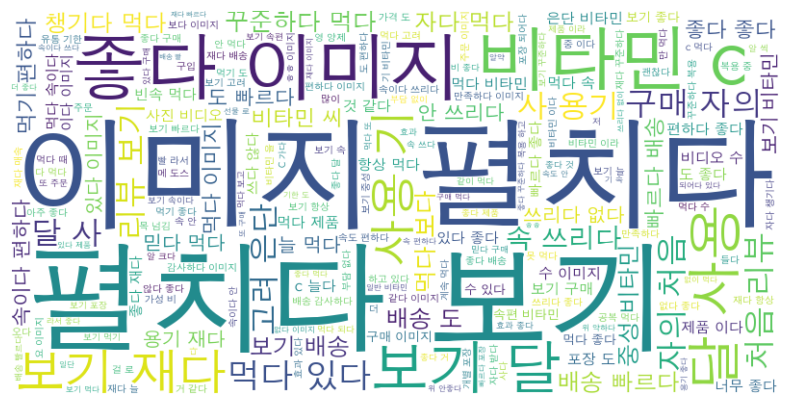

In [39]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터 예시 (주석 해제 후 실제 데이터로 대체하세요)
# df = pd.DataFrame({'리뷰내용_전처리': ["이 제품은 정말 좋아요", "추천합니다", "가격이 좋네요"]})

# '리뷰내용_전처리' 컬럼의 모든 단어를 하나의 문자열로 결합
text = " ".join(df['리뷰내용_전처리'].astype(str).tolist())

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    font_path='/System/Library/Fonts/AppleGothic.ttf'  # Mac에서 사용 가능
).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


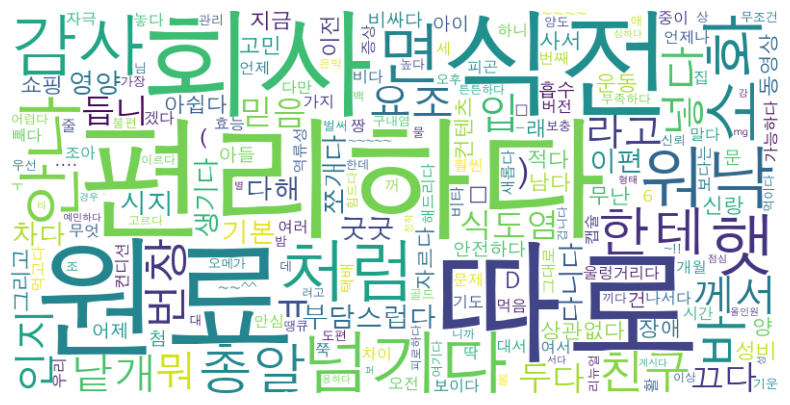

In [67]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 데이터 예시
# df = pd.DataFrame({'리뷰내용_전처리': ["이 제품은 정말 좋아요", "추천합니다", "가격이 좋네요"]})

# '리뷰내용_전처리' 컬럼의 모든 단어를 하나의 문자열로 결합
text = " ".join(df['리뷰내용_전처리'].astype(str).tolist())

# 각 단어의 빈도 계산
word_counts = Counter(text.split())

# 20번 이상 등장한 단어를 제외
filtered_words = {word: count for word, count in word_counts.items() if count <= 60}

# 워드클라우드 생성 (필터링된 단어 사용)
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    font_path='/System/Library/Fonts/AppleGothic.ttf'  # Mac에서 사용 가능
).generate_from_frequencies(filtered_words)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
df.to_excel('/Users/user/Documents/DF/리뷰분석프로젝트/review_sentiment3.xlsx', index=False)